### 1-Data Preprocessing

In [1]:
import tarfile
import pandas as pd
import numpy as np


# Open the test file
with tarfile.open("ML-A5-2023_test.tgz", "r:gz") as test_file:
    # Extract all files to a directory
    test_file.extractall()

# Open the train file
with tarfile.open("ML-A5-2023_train.tgz", "r:gz") as train_file:
    # Extract all files to a directory
    train_file.extractall()

In [2]:
# Read the train data into a dataframe
train_df = pd.read_csv("./ML-A5-2023_train/batch_data.csv")

# Read the test data into a dataframe
test_df = pd.read_csv("./ML-A5-2023_test/batch_data.csv")

In [3]:
df = train_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 2464 entries, batch_id to target
dtypes: float64(2396), int64(2), object(66)
memory usage: 5.3+ MB


In [4]:
# batch_id is irrelevant of task
df = df.drop('batch_id', axis=1)
df

,cell_amplification_J0_Thawing_duration_[Minute],cell_amplification_J0_Viable_cells_start_incub._[million_vi,cell_amplification_J0_Viability_start_incub._[%],cell_amplification_J2_Viable_cells_end_incub._[million,cell_amplification_J2_Viability_end_incub._[%],cell_amplification_J2_Duration_[Hour],cell_amplification_J2_Cumulated_PDL_end_incub.,cell_amplification_J5_Viable_cells_end_incub._[million,cell_amplification_J5_Viability_end_incub._[%],cell_amplification_J5_Duration_[Hour],...,purification__SODIUM_HYDROXYDE_0_5M_FLT_PLAST_BAG__filtration_duree_normalized,purification__WFI_FILT_WN26__filtration_duree_normalized,purification__PO4_10MM_NAOH_25MM_FLT_PLAST_BAG__filtration_duree_normalized,purification__PIPERAZINE_20MM_NACL_100MM_PH3_8_FLT__filtration_duree_normalized,purification__SODIUM_ACETATE_1M_FLT_PH_3_5__filtration_duree_normalized,purification__SODIUM_ACETATE_20MM_PH4_FLT__filtration_duree_normalized,purification__SODIUM_HYDROXIDE_0_01M_FILT__filtration_duree_normalized,purification__PIPERAZINE_20MM_NACL_1_M_PH4_FLT__filtration_duree_normalized,purification__PIPERAZINE_20MM_PH4_FLT__op4100_ph_after_adjustment,target
0,-0.239065,2.273503,0.447379,-0.019585,0.424327,-0.052023,-1.659366,0.807547,-0.219622,-0.061529,...,2.826791,0.766431,0.686522,0.536284,1.609863,1.242612,0.267081,1.115805,1.671054,1
1,-1.892600,0.781797,0.149126,0.197156,0.060305,-0.056338,-0.316776,0.871215,-0.219622,-0.046865,...,1.331981,0.288529,0.267577,0.536284,1.609863,1.242612,0.628595,1.115805,1.671054,1
2,-1.892600,0.781797,1.640389,0.142971,0.788349,-0.057832,-0.764306,-0.020136,-0.219622,-0.055559,...,1.331981,1.137275,2.442613,0.531178,0.939497,2.535292,4.565266,0.852835,1.144021,1
3,-0.239065,1.279033,1.043884,-0.561438,0.424327,-0.056960,-1.211836,0.680211,-0.219622,-0.055726,...,1.302168,-0.081668,2.442613,0.531178,0.939497,2.535292,1.031348,0.852835,1.144021,1
4,-1.892600,1.030415,1.640389,0.955750,0.424327,-0.057272,0.130754,1.507894,-0.219622,-0.055414,...,1.480497,0.330854,2.442613,0.228418,0.819207,0.220502,1.103868,1.424726,-3.072241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-0.239065,0.035945,-0.745631,0.142971,-0.667739,-0.054056,0.130754,-0.720483,-1.307899,-0.056953,...,-0.673842,-0.528892,-0.671286,-0.628349,0.815326,-0.494955,-0.805414,-0.480077,0.441311,1
276,-0.239065,1.279033,0.149126,-0.290512,0.424327,-0.048828,-1.211836,-0.020136,-3.484453,-0.046969,...,-0.673842,-0.528892,-0.671286,-0.628349,-0.090432,-0.494955,-0.805414,-0.480077,0.441311,1
277,-0.239065,-0.958526,1.342136,-1.320032,-0.667739,-0.057541,-0.316776,2.017237,-1.307899,-0.056599,...,-0.955273,-0.622877,-0.787177,-0.142396,-0.090432,-0.494955,-1.470010,-0.480077,-0.612755,1
278,-0.239065,-0.212673,0.149126,3.448274,-0.303717,-0.050322,2.368405,-0.529479,0.868655,-0.055622,...,-0.955273,-0.622877,-0.787177,-0.142396,-0.090432,-0.494955,-1.432007,-0.743666,-0.612755,1


In [5]:
# Checking for NaN values for each column
# We have 280 rows, if a column has more than 28 missing values, it will be dropped
df = df.dropna(axis=1, thresh=len(train_df)-28)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 2449 entries, cell_amplification_J0_Thawing_duration_[Minute] to target
dtypes: float64(2382), int64(1), object(66)
memory usage: 5.2+ MB


In [6]:
# Check for categorical type cols
cat_cols = df.dtypes[df.dtypes == "object"].index
print(len(cat_cols))

66


In [7]:
# Encoding categorical columns

new_df = pd.DataFrame() # Categorical columns are going to be assigned to this new_df

for col in cat_cols:
    new_col_name = col + "_encoded"
    new_df[new_col_name] = df[col].str.extract('(\d+)$', expand=False).astype(float)

In [8]:
df = df.drop(cat_cols, axis=1)
df = pd.concat([df, new_df], axis=1)

In [9]:
# Fill the columns using median
df.fillna(df.median(), inplace=True)

In [10]:
batch_df = df
batch_df

,cell_amplification_J0_Thawing_duration_[Minute],cell_amplification_J0_Viable_cells_start_incub._[million_vi,cell_amplification_J0_Viability_start_incub._[%],cell_amplification_J2_Viable_cells_end_incub._[million,cell_amplification_J2_Viability_end_incub._[%],cell_amplification_J2_Duration_[Hour],cell_amplification_J2_Cumulated_PDL_end_incub.,cell_amplification_J5_Viable_cells_end_incub._[million,cell_amplification_J5_Viability_end_incub._[%],cell_amplification_J5_Duration_[Hour],...,cell_amplification_J7__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,cell_amplification_J9__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,cell_amplification_J12__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,fermentation_J14__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,fermentation_J16__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,perfusion_J18__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,perfusion_J20__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,perfusion_J21__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,production_J22__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded,clarification_J29__INSULINE_5G_L_NFLT__HYDROCHLORIC_ACID__vendor_batch_number_encoded
0,-0.239065,2.273503,0.447379,-0.019585,0.424327,-0.052023,-1.659366,0.807547,-0.219622,-0.061529,...,4.0,7.0,1.0,6.0,4.0,6.0,2.0,5.0,4.0,3.0
1,-1.892600,0.781797,0.149126,0.197156,0.060305,-0.056338,-0.316776,0.871215,-0.219622,-0.046865,...,4.0,7.0,1.0,6.0,4.0,6.0,2.0,5.0,4.0,3.0
2,-1.892600,0.781797,1.640389,0.142971,0.788349,-0.057832,-0.764306,-0.020136,-0.219622,-0.055559,...,4.0,7.0,1.0,6.0,4.0,6.0,2.0,5.0,4.0,3.0
3,-0.239065,1.279033,1.043884,-0.561438,0.424327,-0.056960,-1.211836,0.680211,-0.219622,-0.055726,...,4.0,7.0,1.0,6.0,4.0,6.0,2.0,5.0,4.0,3.0
4,-1.892600,1.030415,1.640389,0.955750,0.424327,-0.057272,0.130754,1.507894,-0.219622,-0.055414,...,4.0,7.0,1.0,6.0,4.0,6.0,2.0,5.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-0.239065,0.035945,-0.745631,0.142971,-0.667739,-0.054056,0.130754,-0.720483,-1.307899,-0.056953,...,4.0,7.0,1.0,6.0,4.0,6.0,7.0,8.0,7.0,3.0
276,-0.239065,1.279033,0.149126,-0.290512,0.424327,-0.048828,-1.211836,-0.020136,-3.484453,-0.046969,...,4.0,7.0,1.0,6.0,4.0,1.0,7.0,8.0,4.0,4.0
277,-0.239065,-0.958526,1.342136,-1.320032,-0.667739,-0.057541,-0.316776,2.017237,-1.307899,-0.056599,...,4.0,7.0,1.0,6.0,8.0,1.0,2.0,5.0,4.0,4.0
278,-0.239065,-0.212673,0.149126,3.448274,-0.303717,-0.050322,2.368405,-0.529479,0.868655,-0.055622,...,4.0,7.0,1.0,6.0,8.0,6.0,2.0,5.0,7.0,4.0


batch_df is ready, let's deal with observations

In [11]:
# Importing observations
aligned_HIST143580_RunData_CabinetTmp =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_CabinetTmp.csv")
aligned_HIST143580_RunData_Cond_101 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Cond_101.csv")
aligned_HIST143580_RunData_Cond_102 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Cond_102.csv")
aligned_HIST143580_RunData_DigitalIn1 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_DigitalIn1.csv")
aligned_HIST143580_RunData_DigitalIn2 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_DigitalIn2.csv")
aligned_HIST143580_RunData_DigitalIn3 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_DigitalIn3.csv")
aligned_HIST143580_RunData_DigitalIn4 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_DigitalIn4.csv")
aligned_HIST143580_RunData_Flow_141 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Flow_141.csv")
aligned_HIST143580_RunData_Flow_142 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Flow_142.csv")
aligned_HIST143580_RunData_pH_121 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_pH_121.csv")
aligned_HIST143580_RunData_Press_111 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Press_111.csv")
aligned_HIST143580_RunData_Press_112 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Press_112.csv")
aligned_HIST143580_RunData_Press_113 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Press_113.csv")
aligned_HIST143580_RunData_Press_114 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Press_114.csv")
aligned_HIST143580_RunData_ProgMix =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_ProgMix.csv")
aligned_HIST143580_RunData_RunMix =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_RunMix.csv")
aligned_HIST143580_RunData_Temp_101 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Temp_101.csv")
aligned_HIST143580_RunData_Temp_102 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_Temp_102.csv")
aligned_HIST143580_RunData_TotalFlow =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_TotalFlow.csv")
aligned_HIST143580_RunData_UV1_131 =  pd.read_csv("./ML-A5-2023_train/aligned_HIST143580_RunData_UV1_131.csv")

In [12]:
# Defining a function to make adjustments on observation dataframes
# After those adjustments we will have a dataframe having 5 columns for each observation

def compress_dataframe(df):
    grouped = df.groupby('batch_id')

    means = grouped['value_approx'].mean()

    max_values = grouped['value_approx'].max()
    min_values = grouped['value_approx'].min()

    min_volume_approx = df.loc[df.groupby('batch_id')['value_approx'].idxmin()][['batch_id', 'volume_approx']]
    max_volume_approx = df.loc[df.groupby('batch_id')['value_approx'].idxmax()][['batch_id', 'volume_approx']]

    result = pd.concat([means, min_values, max_values, min_volume_approx.set_index('batch_id'), max_volume_approx.set_index('batch_id')], axis=1)

    result.columns = ['value_approx_mean', 'value_approx_min', 'value_approx_max', 'volume_approx_min_for_max_value', 'volume_approx_max_for_min_value']
    result = result.sort_index()

    return result

In [13]:
# Creating observation_df

aligned_HIST143580_RunData_CabinetTmp = compress_dataframe(aligned_HIST143580_RunData_CabinetTmp)

aligned_HIST143580_RunData_Cond_101 = compress_dataframe(aligned_HIST143580_RunData_Cond_101)
aligned_HIST143580_RunData_Cond_102 = compress_dataframe(aligned_HIST143580_RunData_Cond_102)

aligned_HIST143580_RunData_DigitalIn1 = compress_dataframe(aligned_HIST143580_RunData_DigitalIn1)
aligned_HIST143580_RunData_DigitalIn2 = compress_dataframe(aligned_HIST143580_RunData_DigitalIn2)
aligned_HIST143580_RunData_DigitalIn3 = compress_dataframe(aligned_HIST143580_RunData_DigitalIn3)
aligned_HIST143580_RunData_DigitalIn4 = compress_dataframe(aligned_HIST143580_RunData_DigitalIn4)

aligned_HIST143580_RunData_Flow_141 = compress_dataframe(aligned_HIST143580_RunData_Flow_141)
aligned_HIST143580_RunData_Flow_142 = compress_dataframe(aligned_HIST143580_RunData_Flow_142)

aligned_HIST143580_RunData_pH_121 = compress_dataframe(aligned_HIST143580_RunData_pH_121)

aligned_HIST143580_RunData_Press_111 = compress_dataframe(aligned_HIST143580_RunData_Press_111)
aligned_HIST143580_RunData_Press_112 = compress_dataframe(aligned_HIST143580_RunData_Press_112)
aligned_HIST143580_RunData_Press_113 = compress_dataframe(aligned_HIST143580_RunData_Press_113)
aligned_HIST143580_RunData_Press_114 = compress_dataframe(aligned_HIST143580_RunData_Press_114)

aligned_HIST143580_RunData_ProgMix = compress_dataframe(aligned_HIST143580_RunData_ProgMix)
aligned_HIST143580_RunData_RunMix = compress_dataframe(aligned_HIST143580_RunData_RunMix)

aligned_HIST143580_RunData_Temp_101 = compress_dataframe(aligned_HIST143580_RunData_Temp_101)
aligned_HIST143580_RunData_Temp_102 = compress_dataframe(aligned_HIST143580_RunData_Temp_102)

aligned_HIST143580_RunData_TotalFlow = compress_dataframe(aligned_HIST143580_RunData_TotalFlow)

aligned_HIST143580_RunData_UV1_131 = compress_dataframe(aligned_HIST143580_RunData_UV1_131)

In [14]:
# Merging all dataframes to obtain a final observation_df
observation_df = pd.concat([aligned_HIST143580_RunData_CabinetTmp, 
                aligned_HIST143580_RunData_Cond_101, aligned_HIST143580_RunData_Cond_102,
                aligned_HIST143580_RunData_DigitalIn1,aligned_HIST143580_RunData_DigitalIn2,
                aligned_HIST143580_RunData_DigitalIn3,aligned_HIST143580_RunData_DigitalIn4,
                aligned_HIST143580_RunData_Flow_141,aligned_HIST143580_RunData_Flow_142,
                aligned_HIST143580_RunData_pH_121,aligned_HIST143580_RunData_Press_111,
                aligned_HIST143580_RunData_Press_112,aligned_HIST143580_RunData_Press_113,
                aligned_HIST143580_RunData_Press_114,aligned_HIST143580_RunData_ProgMix,
                aligned_HIST143580_RunData_RunMix,aligned_HIST143580_RunData_Temp_101,
                aligned_HIST143580_RunData_Temp_102,aligned_HIST143580_RunData_TotalFlow,
                aligned_HIST143580_RunData_UV1_131], axis=1)

In [15]:
from sklearn.decomposition import PCA

# Applying PCA to observation_df
pca_model = PCA(n_components=15)
transformed_df = pca_model.fit_transform(observation_df)

observation_df = pd.DataFrame(data=transformed_df, columns=['PC{}'.format(i) for i in range(1, 16)])

In [16]:
# observation_df is ready
observation_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-125.961469,15.762532,-180.632315,-219.946726,165.898297,531.163985,-557.037512,31.747122,-333.452083,283.425200,378.390820,73.499239,-227.283879,-126.543549,61.788871
1,-775.422623,-527.121169,1152.677365,-60.833329,281.816035,-58.984902,-949.783615,383.647765,175.002976,-251.224618,26.546500,66.546447,-153.274949,84.562525,537.951049
2,-576.109208,-658.704261,-352.141147,608.543258,-320.024058,-116.973843,-54.052830,1072.860182,-445.304490,134.861264,605.108399,85.892071,-227.681670,10.849628,-53.270330
3,-814.031290,-841.827158,-368.262036,355.642578,-372.137453,-177.550156,8.811098,1041.658950,33.389020,-95.511540,158.868907,570.696005,145.854670,107.970480,-80.125229
4,-257.415325,-601.768956,-253.281622,648.092956,-284.961469,290.794334,-68.734324,369.012649,38.367331,-425.692054,7.524199,61.053212,50.942201,45.430048,-26.664293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1350.795073,-87.501833,-389.935050,299.004135,-262.608439,286.649140,-127.104573,-86.841841,-162.199603,123.374495,-290.483400,-173.428564,33.128968,-38.046713,-22.111664
276,24.158014,-765.767238,-786.427122,-590.862777,-218.939534,-47.416187,160.004149,-19.177039,115.407895,-197.368403,-449.594259,-183.095931,220.128819,61.025649,50.803647
277,1534.713924,-558.949495,909.801957,161.354688,35.101492,-364.754420,-532.559488,-141.204844,-231.030111,250.671053,-194.868008,-260.787877,-122.047220,38.266557,-46.715493
278,-586.002472,-1094.529363,-527.816825,156.910351,-136.082237,208.472384,101.142771,-224.092942,-291.444417,184.917196,-144.554631,-49.846000,97.042786,35.083188,-7.387407


observation_df is ready, let's merge them together

In [17]:
# Merging dataframes

batch_df.reset_index(drop=True, inplace=True)
observation_df.reset_index(drop=True, inplace=True)

df = pd.concat([batch_df, observation_df], axis=1)
df

,batch_id,cell_amplification_J0_Thawing_duration_[Minute],cell_amplification_J0_Viable_cells_start_incub._[million_vi,cell_amplification_J0_Viability_start_incub._[%],cell_amplification_J2_Viable_cells_end_incub._[million,cell_amplification_J2_Viability_end_incub._[%],cell_amplification_J2_Duration_[Hour],cell_amplification_J2_Cumulated_PDL_end_incub.,cell_amplification_J5_Viable_cells_end_incub._[million,cell_amplification_J5_Viability_end_incub._[%],...,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,6,-0.239065,2.273503,0.447379,-0.019585,0.424327,-0.052023,-1.659366,0.807547,-0.219622,...,531.163985,-557.037512,31.747122,-333.452083,283.425200,378.390820,73.499239,-227.283879,-126.543549,61.788871
1,7,-1.892600,0.781797,0.149126,0.197156,0.060305,-0.056338,-0.316776,0.871215,-0.219622,...,-58.984902,-949.783615,383.647765,175.002976,-251.224618,26.546500,66.546447,-153.274949,84.562525,537.951049
2,8,-1.892600,0.781797,1.640389,0.142971,0.788349,-0.057832,-0.764306,-0.020136,-0.219622,...,-116.973843,-54.052830,1072.860182,-445.304490,134.861264,605.108399,85.892071,-227.681670,10.849628,-53.270330
3,9,-0.239065,1.279033,1.043884,-0.561438,0.424327,-0.056960,-1.211836,0.680211,-0.219622,...,-177.550156,8.811098,1041.658950,33.389020,-95.511540,158.868907,570.696005,145.854670,107.970480,-80.125229
4,10,-1.892600,1.030415,1.640389,0.955750,0.424327,-0.057272,0.130754,1.507894,-0.219622,...,290.794334,-68.734324,369.012649,38.367331,-425.692054,7.524199,61.053212,50.942201,45.430048,-26.664293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,382,-0.239065,0.035945,-0.745631,0.142971,-0.667739,-0.054056,0.130754,-0.720483,-1.307899,...,286.649140,-127.104573,-86.841841,-162.199603,123.374495,-290.483400,-173.428564,33.128968,-38.046713,-22.111664
276,383,-0.239065,1.279033,0.149126,-0.290512,0.424327,-0.048828,-1.211836,-0.020136,-3.484453,...,-47.416187,160.004149,-19.177039,115.407895,-197.368403,-449.594259,-183.095931,220.128819,61.025649,50.803647
277,384,-0.239065,-0.958526,1.342136,-1.320032,-0.667739,-0.057541,-0.316776,2.017237,-1.307899,...,-364.754420,-532.559488,-141.204844,-231.030111,250.671053,-194.868008,-260.787877,-122.047220,38.266557,-46.715493
278,385,-0.239065,-0.212673,0.149126,3.448274,-0.303717,-0.050322,2.368405,-0.529479,0.868655,...,208.472384,101.142771,-224.092942,-291.444417,184.917196,-144.554631,-49.846000,97.042786,35.083188,-7.387407


### 2-Feature Engineering

1    224
0     56
Name: target, dtype: int64


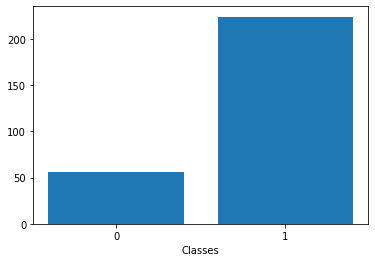

In [18]:
# Let's examine the target column
import matplotlib.pyplot as plt

# Count the 1s and 0s
class_counts = df['target'].value_counts()
print(class_counts)

# Visualize
plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, ['1', '0'])
plt.xlabel('Classes')
plt.show()

In [19]:
# Feature engineering using correlation
corr = df.corr()['target']
cols_to_drop = corr[abs(corr) < 0.25].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
df

,batch_id,cell_amplification_J29_Duration_[Hour],clarification_J29_Clarif._yield_UPLC_[%],cell_amplification_J29_Clarification_duration_[Minute],purification__K2HPO4_4_9MM_NAH2PO42H2O_5_1MM_PH6_8_FLT__op4100_total_volume_for_ph_adjustment,purification__K2HPO4_4_9MM_NAH2PO42H2O_5_1MM_PH6_8_FLT__SODIUM_DIHYDROGEN_PHOSPHATE_DIHYDR_5KG__LOSS_ON_DRYING,purification__NA2HPO4_10MM_PH7_FLT__DISODIUM_PHOSPHATE_ANHYDROUS__coa_pH,purification__NA2HPO4_200MM_PH7_FLT__theoretical_volume,purification__NA2HPO4_200MM_PH7_FLT__real_volume,purification__NA2HPO4_200MM_PH7_FLT__op4100_total_volume_for_ph_adjustment,...,cell_amplification_J9__FERRIC_FRUCTOSE_SOL__FERRIC_CHLORIDE_HEXAHYDRATE_EP__vendor_batch_number_encoded,cell_amplification_J9__FERRIC_FRUCTOSE_SOL__POTASSIUM_HYDROXYDE_SOL_6M__POTASSIUM_HYDROXYDE_PELLETS__vendor_batch_number_encoded,cell_amplification_J12__FERRIC_FRUCTOSE_SOL__FERRIC_CHLORIDE_HEXAHYDRATE_EP__vendor_batch_number_encoded,fermentation_J14__SODIUM_HYDROGEN_CARBONATE__vendor_batch_number_encoded,perfusion_J18__SODIUM_HYDROGEN_CARBONATE__vendor_batch_number_encoded,perfusion_J18__FERRIC_FRUCTOSE_SOL__FERRIC_CHLORIDE_HEXAHYDRATE_EP__vendor_batch_number_encoded,perfusion_J20__FERRIC_FRUCTOSE_SOL__FERRIC_CHLORIDE_HEXAHYDRATE_EP__vendor_batch_number_encoded,perfusion_J21__FERRIC_FRUCTOSE_SOL__POTASSIUM_HYDROXYDE_SOL_6M__POTASSIUM_HYDROXYDE_PELLETS__vendor_batch_number_encoded,clarification_J29__FERRIC_FRUCTOSE_SOL__D_FRUCTOSE_LAEVULOSE_250G__vendor_batch_number_encoded,clarification_J29__FERRIC_FRUCTOSE_SOL__POTASSIUM_HYDROXYDE_SOL_6M__POTASSIUM_HYDROXYDE_PELLETS__vendor_batch_number_encoded
0,6,0.518438,2.173844,-0.927053,-0.014059,-1.706115,-1.030174,-1.367342,-1.391970,-2.163295,...,5.0,3.0,4.0,2.0,2.0,2.0,6.0,3.0,3.0,5.0
1,7,0.501923,1.765633,-0.574799,-0.014059,-1.706115,-1.030174,-1.367342,-1.391970,-2.163295,...,5.0,3.0,4.0,2.0,2.0,2.0,6.0,3.0,3.0,5.0
2,8,0.521394,1.765633,-0.794958,-1.475831,-1.706115,-1.030174,-0.777568,-0.740968,-0.701912,...,5.0,3.0,4.0,7.0,8.0,2.0,6.0,3.0,3.0,5.0
3,9,0.518786,2.173844,-0.046419,-1.135419,-1.706115,-1.030174,-0.777568,-0.740968,-0.701912,...,5.0,3.0,4.0,7.0,8.0,2.0,6.0,3.0,3.0,5.0
4,10,0.520525,1.765633,-0.090451,-1.475831,-1.706115,-1.030174,-0.777568,-0.740968,-0.701912,...,5.0,3.0,4.0,7.0,8.0,2.0,6.0,3.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,382,-1.888077,-0.683630,-0.883021,0.406451,0.841547,0.849044,1.328769,1.300736,1.167402,...,2.0,6.0,1.0,3.0,1.0,6.0,2.0,8.0,5.0,8.0
276,383,-1.942837,0.132791,-0.927053,0.366402,0.841547,0.849044,1.328769,1.300736,1.167402,...,2.0,6.0,1.0,3.0,1.0,6.0,2.0,8.0,5.0,8.0
277,384,-1.855916,-0.275419,-1.235275,0.366402,0.841547,0.849044,1.328769,1.300736,1.167402,...,2.0,6.0,1.0,3.0,1.0,6.0,2.0,8.0,5.0,8.0
278,385,-1.865825,0.336897,-1.015116,0.366402,0.841547,0.849044,1.328769,1.300736,1.167402,...,2.0,6.0,1.0,3.0,1.0,6.0,2.0,8.0,5.0,8.0


### 3-Applying Model

In [20]:
# Splitting into train and validation set
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

# Scaling the X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(np.shape(x_train))

# Applying SMOTE into train-set because there is a mis-match between 1s and 0s in target column
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


print(np.shape(x_train))

(224, 158)
(360, 158)


In [21]:
# Applying logistic regression 
# After several tries, this model found the best for this task
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, solver='saga', penalty='l2')
lr.fit(x_train, y_train)

x_pred = lr.predict(x_train)
y_pred = lr.predict(x_val)

In [22]:
# Printing out the results according to BCR
from sklearn.metrics import confusion_matrix

# Obtaining confusion matrix 
tn1, fp1, fn1, tp1 = confusion_matrix(y_train, x_pred).ravel() # confusion matrix for train
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel() # confusion matrix for val

# Calculating and printing BCR 
bcr1 = 0.5 * ((tp1 / (tp1 + fn1)) + (tn1 / (tn1 + fp1)))
print(f"Balanced Classification Rate (Train): {bcr1:.3f}") # for train-set

bcr = 0.5 * ((tp / (tp + fn)) + (tn / (tn + fp)))
print(f"Balanced Classification Rate (Val): {bcr:.3f}") # for val-set

Balanced Classification Rate (Train): 0.853
Balanced Classification Rate (Val): 0.886


In [23]:
# Applying cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the BCR scorer
bcr_scorer = make_scorer(lambda y_val, y_pred: 0.5 * ((tp / (tp + fn)) + (tn / (tn + fp))), 
                         greater_is_better=True)

# Perform 10-fold cross-validation
scores = cross_val_score(lr, X, y, cv=10, scoring=bcr_scorer) # validation

# Print the average BCR score across all folds
print(f"Average BCR score across 10 folds for val: {scores.mean():.3f}")

Average BCR score across 10 folds for val: 0.886
